#                          🍽 Zomato Restaurant Data Analysis

### Introduction

The food delivery industry has grown rapidly in recent years, with platforms like Zomato playing a major role in connecting users with restaurants. This project focuses on exploratory data analysis (EDA) of a real-world Zomato dataset to uncover insights about restaurants, customer preferences, and service trends.

Using tools like Pandas, Seaborn, and Matplotlib, we:

- Explored the dataset structure and summary statistics

- Cleaned and prepared the data for analysis

- Filtered and grouped data for meaningful comparisons

- Sorted and aggregated key metrics like ratings and cost

- Visualized important trends across cuisine types, cities, online orders, and more


This analysis provides valuable insights for food lovers, restaurant owners, and business strategists interested in customer behavior and restaurant performance.




In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive (2).zip to archive (2).zip


## 📚 Importing Necessary Libraries

We’ll start by importing essential Python libraries used for data analysis and visualization.


In [ ]:
import zipfile

with zipfile.ZipFile("/content/archive (2).zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")

import os
os.listdir("/content/")


['.config', 'zomato.csv', 'archive (2).zip', 'sample_data']

## 📂 Loading the Dataset

Now we’ll load the Zomato dataset (CSV file) into a pandas DataFrame.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv("/content/zomato.csv", encoding='latin1')
df.head()


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## 🔍 Apply Basic Functions

We'll now explore the basic structure of the dataset, including the number of rows and columns, column names, data types, and summary statistics.


In [ ]:
print("Dataset Shape:", df.shape)



Dataset Shape: (51717, 17)


In [ ]:
print("Columns:",df.columns)

Columns: Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')


In [ ]:
print("Data Types:\n",df.dtypes)

Data Types:
 url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object


In [ ]:
print("Info:")
df.info()

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list             

In [ ]:
print("Describe:\n",df.describe())

Describe:
               votes
count  51717.000000
mean     283.697527
std      803.838853
min        0.000000
25%        7.000000
50%       41.000000
75%      198.000000
max    16832.000000


In [ ]:
print("Null Values:\n",df.isnull().sum())


Null Values:
 url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64


In [ ]:
print("Duplicate Rows:",df.duplicated().sum())

Duplicate Rows: 0


In [ ]:
print("Unique Values:\n",df.nunique())

Unique Values:
 url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64


In [ ]:
print("Index:",df.index)

Index: RangeIndex(start=0, stop=51717, step=1)


In [ ]:
print("Values Sample:\n",df.sample(1))

Values Sample:
                                                      url  \
19890  https://www.zomato.com/bangalore/penthouse-caf...   

                                                 address            name  \
19890  1, 30th Main Road, 3rd Stage, Banashankari, Ba...  Penthouse Cafe   

      online_order book_table   rate  votes                             phone  \
19890          Yes         No  4.0/5    328  +91 8884135549\r\n+91 9449449316   

           location rest_type  \
19890  Banashankari      Cafe   

                                              dish_liked  \
19890  Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...   

                         cuisines approx_cost(for two people)  \
19890  Cafe, Italian, Continental                         700   

                                            reviews_list  \
19890  [('Rated 3.0', "RATED\n  I had been to this pl...   

                                               menu_item listed_in(type)  \
19890  ['That Paneer Lover Pizz

In [ ]:
print("Memory Usage:\n",df.memory_usage)

Memory Usage:
 <bound method DataFrame.memory_usage of                                                      url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51713  https://www.zomato.com/bangalore/vinod-bar-and...   
51714  https://www.zomato.com/bangalore/plunge-sherat...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 1

In [ ]:
print("Value Counts (City):\n",df['listed_in(city)'].value_counts())

Value Counts (City):
 listed_in(city)
BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Brigade Road             1769
Lavelle Road             1744
HSR                      1741
Marathahalli             1659
Residency Road           1620
Whitefield               1620
Bannerghatta Road        1617
Brookefield              1518
Old Airport Road         1425
Kammanahalli             1329
Kalyan Nagar             1309
Basavanagudi             1266
Sarjapur Road            1261
Electronic City          1229
Bellandur                1227
Frazer Town              1185
Malleshwaram             1096
Rajajinagar              1079
Banashankari              863
New BEL Road              740
Name: count, dtype: int64


In [ ]:
print("Unique Restaurant Types:\n",df['rest_type'].unique())

Unique Restaurant Types:
 ['Casual Dining' 'Cafe, Casual Dining' 'Quick Bites' 'Casual Dining, Cafe'
 'Cafe' 'Quick Bites, Cafe' 'Cafe, Quick Bites' 'Delivery' 'Mess'
 'Dessert Parlor' 'Bakery, Dessert Parlor' 'Pub' 'Bakery'
 'Takeaway, Delivery' 'Fine Dining' 'Beverage Shop' 'Sweet Shop' 'Bar'
 'Beverage Shop, Quick Bites' 'Confectionery' 'Quick Bites, Beverage Shop'
 'Dessert Parlor, Sweet Shop' 'Bakery, Quick Bites'
 'Sweet Shop, Quick Bites' 'Kiosk' 'Food Truck'
 'Quick Bites, Dessert Parlor' 'Beverage Shop, Dessert Parlor' 'Takeaway'
 'Pub, Casual Dining' 'Casual Dining, Bar' 'Dessert Parlor, Beverage Shop'
 'Quick Bites, Bakery' 'Dessert Parlor, Quick Bites'
 'Microbrewery, Casual Dining' 'Lounge' 'Bar, Casual Dining' 'Food Court'
 'Cafe, Bakery' nan 'Dhaba' 'Quick Bites, Sweet Shop' 'Microbrewery'
 'Food Court, Quick Bites' 'Pub, Bar' 'Casual Dining, Pub' 'Lounge, Bar'
 'Food Court, Dessert Parlor' 'Casual Dining, Sweet Shop'
 'Food Court, Casual Dining' 'Casual Dining, Microbre

In [ ]:
print("Total Ratings:",df['rate'].count())

Total Ratings: 43942


## 🧼Data Cleaning

In this step, we perform essential cleaning operations to prepare the dataset for analysis:

- Removing Duplicate Entries: Duplicate rows are dropped to avoid data redundancy and ensure accurate insights.

- Cleaning the rate Column:
The rate column contains values like '4.1/5', 'NEW', or 'nan'.

- We remove the /5 suffix and replace 'NEW' and 'nan' with NaN (missing values).

- The cleaned rate column is then converted to numeric data type for proper analysis.

- Normalizing the online_order Column:
We convert all values in the online_order column to lowercase and strip extra spaces.

This helps avoid issues due to case sensitivity or whitespace during filtering. These steps ensure that the data is consistent, accurate, and ready for further analysis and visualization.



In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['rate']=df['rate'].astype(str).str.replace("/5","",regex=False).replace("NEW",pd.NA).replace("nan",pd.NA)
df['rate']=pd.to_numeric(df['rate'],errors='coerce')


In [ ]:
df['online_order']=df['online_order'].astype(str).str.strip().str.lower()

In [ ]:
print("\n Cleaning Completed.Sample Data:\n",df.head())


 Cleaning Completed.Sample Data:
                                                  url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1

## 🧹Data Filtering
In this step, we filter the dataset based on specific conditions to extract meaningful subsets of data:

- High Rated Restaurants: We filter restaurants with a rating greater than 4.5 to identify top-performing establishments.

- Online Delivery Restaurants: We filter restaurants that offer online delivery by checking where the online_order column is 'yes'.

These filtered datasets help in understanding which restaurants maintain excellent customer satisfaction and which ones cater to online delivery preferences.

In [ ]:
#High Rated Restaurants
high_rated=df[df['rate']>4.5]
print("High Rated Restaurants(>4.5):\n",high_rated.head())

High Rated Restaurants(>4.5):
                                                    url  \
7    https://www.zomato.com/bangalore/onesta-banash...   
44   https://www.zomato.com/bangalore/onesta-banash...   
164  https://www.zomato.com/bangalore/the-blue-wago...   
557  https://www.zomato.com/bangalore/onesta-banash...   
632  https://www.zomato.com/bangalore/taaza-thindi-...   

                                               address  \
7    2469, 3rd Floor, 24th Cross, Opposite BDA Comp...   
44   2469, 3rd Floor, 24th Cross, Opposite BDA Comp...   
164  615/1, Ground Floor, Janardhan Mansion, 10th C...   
557  2469, 3rd Floor, 24th Cross, Opposite BDA Comp...   
632  115, 100 Feet Ring Road, Kathriguppe, Banashan...   

                         name online_order book_table  rate  votes  \
7                      Onesta          yes        Yes   4.6   2556   
44                     Onesta          yes        Yes   4.6   2556   
164  The Blue Wagon - Kitchen          yes         No   4.6  

In [ ]:
#Restaurants Offering Online Delivery
delivery_only = df[df['online_order'] == 'yes']
print("Restaurants with Online Delivery:\n",delivery_only.head())

Restaurants with Online Delivery:
                                                  url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
5  https://www.zomato.com/bangalore/timepass-dinn...   
7  https://www.zomato.com/bangalore/onesta-banash...   

                                             address             name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...            Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...  San Churro Cafe   
5  37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...  Timepass Dinner   
7  2469, 3rd Floor, 24th Cross, Opposite BDA Comp...           Onesta   

  online_order book_table  rate  votes                             phone  \
0          yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          yes         No   4.1    78

## 📊 Data Grouping
In this section, we use the groupby() function to analyze aggregated information by categories:

- Restaurant Count by City:
We group the data by the city column and count the number of restaurants in each city.
This helps identify cities with the highest number of listed restaurants.

- Average Rating by Cuisine:
We group the data by the cuisines column and calculate the average rate for each cuisine type.This allows us to understand which cuisines generally receive higher customer ratings.

Grouping is useful for summarizing the dataset and spotting patterns based on categories like location and food type.

In [ ]:
city_group=df.groupby('listed_in(city)')['name'].count().reset_index().rename(columns={'name':'restaurant_count'})
print("\nRestaurant Count by City:\n",city_group.head())


Restaurant Count by City:
      listed_in(city)  restaurant_count
0                BTM              3279
1       Banashankari               863
2  Bannerghatta Road              1617
3       Basavanagudi              1266
4          Bellandur              1227


In [ ]:
cuisine_rating=df.groupby('cuisines')['rate'].mean().reset_index().sort_values(by='rate',ascending=False)
print("\n AVerage Rating by Cuisine:\n",cuisine_rating.head())


 AVerage Rating by Cuisine:
                                                cuisines  rate
1469                 Healthy Food, Salad, Mediterranean   4.9
204                         Asian, Chinese, Thai, Momos   4.9
1155  Continental, North Indian, Italian, South Indi...   4.9
1141  Continental, North Indian, Chinese, European, ...   4.8
225             Asian, Mediterranean, North Indian, BBQ   4.8


## 🔽 Data Sorting

In this section, we sort the dataset based on specific columns to identify important trends:

- Restaurants Sorted by Rating:
We sort the data in descending order based on the rate column.
This helps us quickly find the top-rated restaurants in the dataset.

- Restaurants Sorted by Cost:
We sort the data in ascending order based on the approx_cost(for two people) column.
This helps us identify the most affordable dining options available.

Sorting allows us to rank restaurants based on performance metrics like customer ratings and cost, making it easier to draw insights and recommendations.

In [ ]:
sorted_by_rating=df.sort_values(by='rate',ascending=False)
print("\n Restaurants Sorted by Rating:\n",sorted_by_rating[['name','rate']].head())


 Restaurants Sorted by Rating:
                                  name  rate
10284          Belgian Waffle Factory   4.9
7888                         Flechazo   4.9
42381          Belgian Waffle Factory   4.9
28403  Asia Kitchen By Mainland China   4.9
33932  Asia Kitchen By Mainland China   4.9


In [ ]:
sorted_by_cost=df.sort_values(by='approx_cost(for two people)',ascending=True)
print("/n Restaurant Sorted by Cost:\n",sorted_by_cost[['name','approx_cost(for two people)']].head())

/n Restaurant Sorted by Cost:
                 name approx_cost(for two people)
19408  The Pavillion                       1,000
34075     PagalKhana                       1,000
43887          Rasta                       1,000
43890      Manhattan                       1,000
34061        JukeBox                       1,000


## 📈 Data Aggregation
In this step, we apply statistical aggregation functions to the rate column to get a summary of restaurant ratings:

- Minimum Rating: The lowest rating in the dataset.

- Maximum Rating: The highest rating given to any restaurant.

- Mean (Average) Rating: The overall average rating across all restaurants.

- Median Rating: The middle value when all ratings are sorted.

- Mode Rating: The most frequently occurring rating.

- Variance: The measure of how much the ratings vary from the average.

Aggregation provides a quick statistical overview that helps understand the central tendency and distribution of ratings in the dataset.

In [ ]:
# Calculate basic statistics
rate_stats = df['rate'].agg(['min', 'max', 'mean', 'median', 'var'])
mode_rate = df['rate'].mode()
print("\nRating Statistics:\n",rate_stats)
print("\nMode Rating:\n", mode_rate)


Rating Statistics:
 min       1.800000
max       4.900000
mean      3.700449
median    3.700000
var       0.194051
Name: rate, dtype: float64

Mode Rating:
 0    3.9
Name: rate, dtype: float64


## 📊Data Visualization

In this section, we create visual plots to better understand patterns and distributions within the dataset:

- Online Order Availability:
A count plot showing how many restaurants offer online ordering versus those that do not.

- Rating Distribution:
A histogram to visualize the spread and frequency of restaurant ratings.

- Top 10 Cuisines:
A bar plot showing the most common cuisine types in the dataset.

- Top 10 Restaurant Types:
A horizontal count plot displaying the most popular types of restaurants.

- Votes vs Rating:
A scatter plot to observe the relationship between the number of votes and the restaurant ratings.

Visualizations make it easier to interpret large datasets and reveal hidden insights through trends, distributions, and relationships.

### 1. Online Order Availability

This plot shows how many restaurants accept online orders versus those that do not.


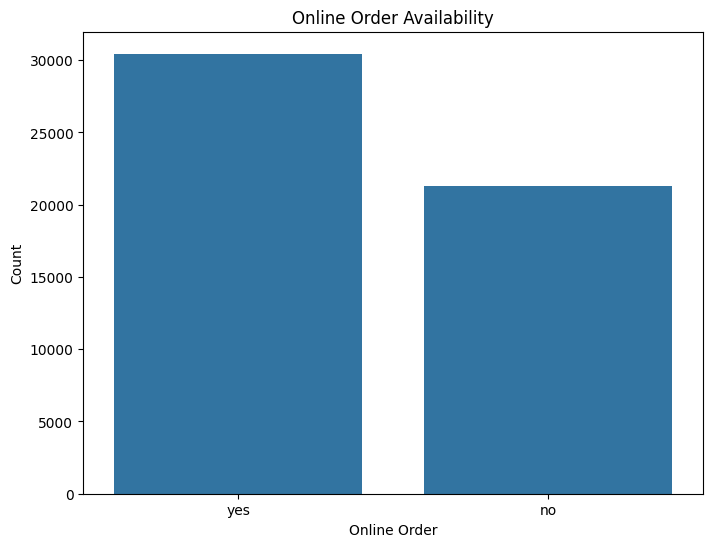

In [ ]:
#online order availability
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='online_order')
plt.title('Online Order Availability')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.show()


### 2. Rating Distribution
A histogram to visualize the spread and frequency of restaurant ratings.


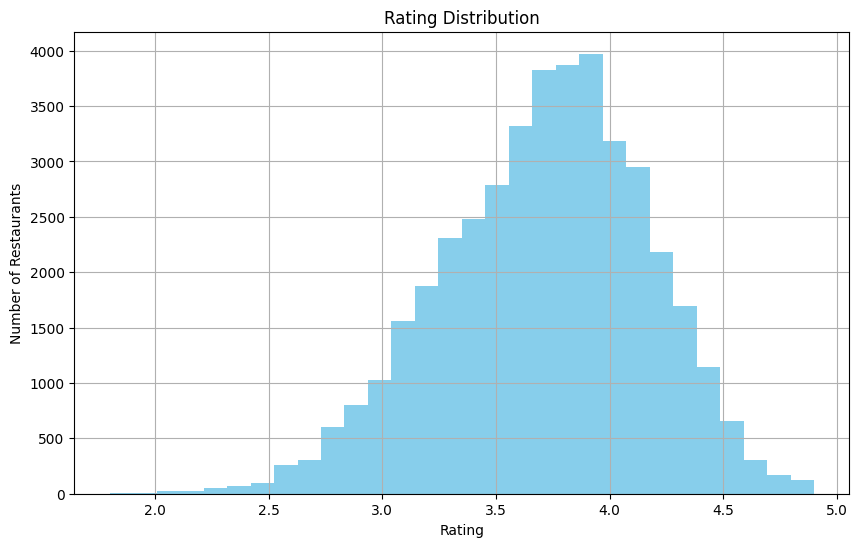

In [ ]:
plt.figure(figsize=(10, 6))
df['rate'].hist(bins=30,color='skyblue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.show()


### 3. Top 10 Cuisines
A bar plot showing the most common cuisine types in the dataset.

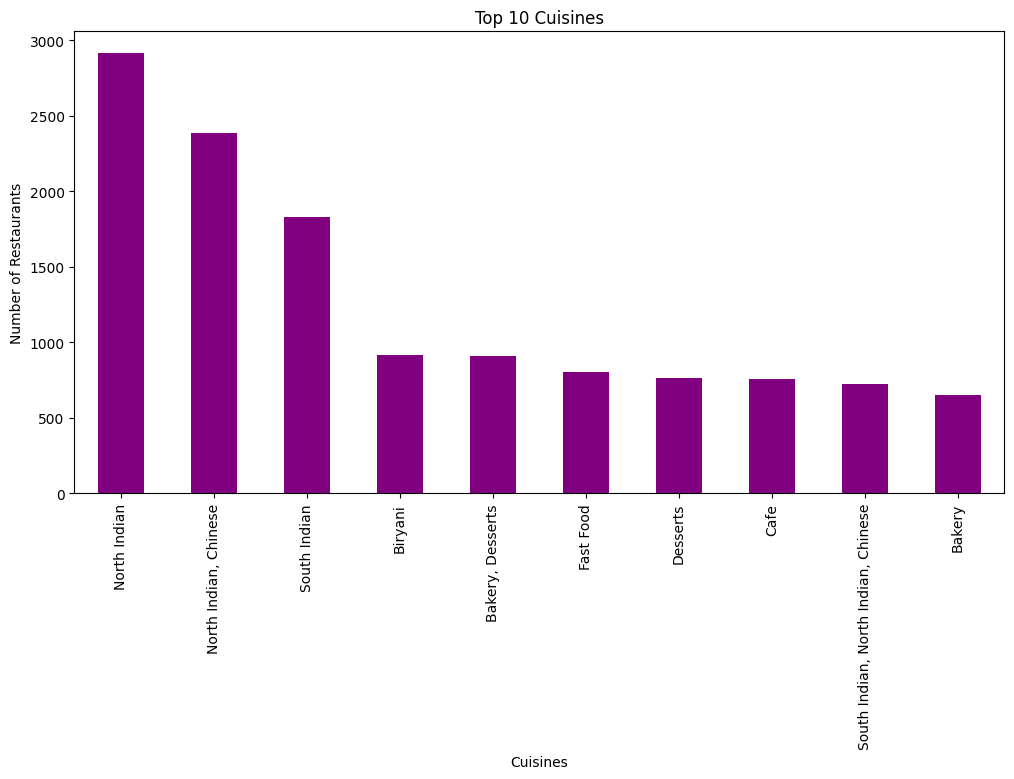

In [ ]:
plt.figure(figsize=(12, 6))
top_cuisines=df['cuisines'].value_counts().head(10)
top_cuisines.plot(kind='bar',color='purple')
plt.title('Top 10 Cuisines')
plt.xlabel('Cuisines')
plt.ylabel('Number of Restaurants')
plt.show()


### 3. Top 10 Restaurant Types

A horizontal count plot displaying the most popular types of restaurants.

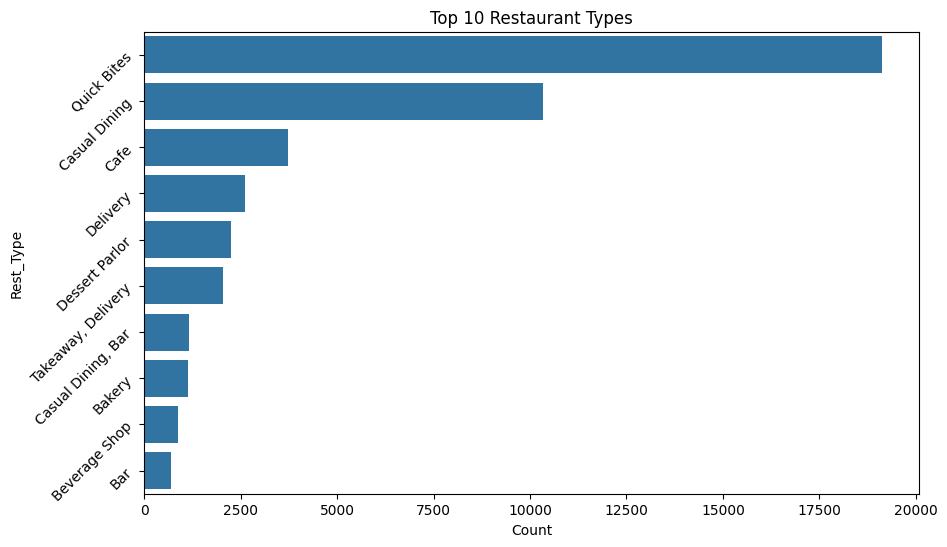

In [ ]:
# Top 10 restaurant types
plt.figure(figsize=(10, 6))
sns.countplot(data=df,y='rest_type',order=df['rest_type'].value_counts().head(10).index,)
plt.title('Top 10 Restaurant Types')
plt.yticks(rotation=45)
plt.ylabel('Rest_Type')
plt.xlabel('Count')
plt.show()


### 5. Votes vs Rating

A scatter plot to observe the relationship between the number of votes and the restaurant ratings.


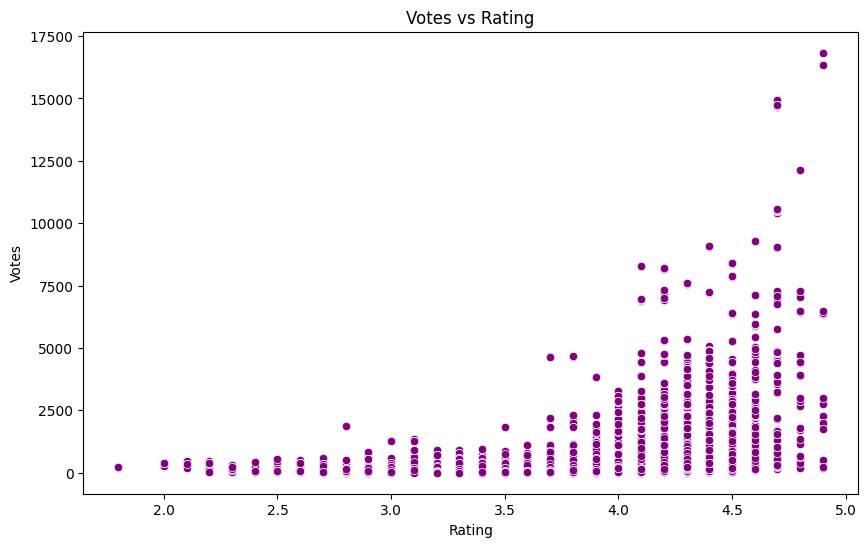

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='rate', y='votes', color='purple')
plt.title('Votes vs Rating')
plt.ylabel('Votes')
plt.xlabel('Rating')
plt.show()


### 🏙 Final Visualization: Top 10 Cities by Number of Restaurants

This bar chart displays the cities with the highest number of restaurants listed on the platform. It provides a geographical perspective on restaurant density and customer reach, highlighting the most active food hubs.

Ending with this visual gives a conclusive insight into how restaurant availability varies across cities, which is useful for both customers and businesses.

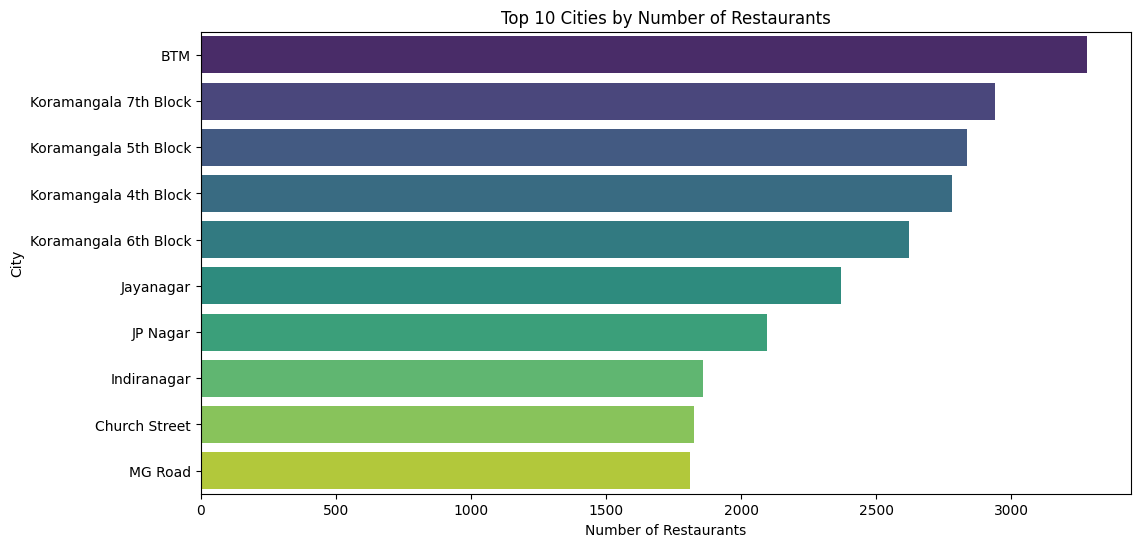

In [ ]:
plt.figure(figsize=(12,6))
top_cities = df['listed_in(city)'].value_counts().head(10)
sns.barplot(x=top_cities.values,y=top_cities.index,palette='viridis')
plt.title('Top 10 Cities by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

✅ Conclusion

In this project, we performed an end-to-end exploratory data analysis (EDA) on Zomato's restaurant dataset. The key steps and insights include:

- Initial Exploration: We used basic pandas functions to understand the structure, types, and completeness of the data.

- Data Cleaning: We removed duplicate entries, cleaned the rate column by handling special values like "NEW" and "nan", and standardized text columns such as online_order.

- Filtering and Grouping: We filtered high-rated restaurants and those offering online delivery. Grouped data gave us insights into restaurant distribution by city and cuisine, and the average ratings per cuisine.

- Sorting and Aggregation: We sorted restaurants by rating and cost, and calculated statistical measures like mean, median, and mode of ratings for deeper understanding.

- Visualization: Multiple visualizations were created, including:

     Online ordering availability

     Rating distribution

     Popular cuisines and restaurant types

     Votes vs rating trend

     Top cities by number of restaurants



These steps helped uncover patterns in user preferences, city-wise trends, and the nature of the restaurant landscape on the Zomato platform. This analysis can be useful for customers, restaurant owners, and food delivery strategists alike.
